# Hierarchical Clustering with Python and Scikit-Learn

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar. Before implementing hierarchical clustering using Scikit-Learn, let's first understand the theory behind hierarchical clustering.

## Theory of Hierarchical Clustering

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this article we will focus on agglomerative clustering that involves the bottom-up approach.

## Steps to Perform Hierarchical Clustering

Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.

2. Form a cluster by joining the two closest data points resulting in K-1 clusters.

3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.

4. Repeat the above three steps until one big cluster is formed.

5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

1. Measure the distance between the closes points of two clusters.

2. Measure the distance between the farthest points of two clusters.

3. Measure the distance between the centroids of two clusters.

4. Measure the distance between all possible combination of points between the two clusters and take the mean.

## Role of Dendrograms for Hierarchical Clustering

In the last section, we said that once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

Suppose we have a collection of data points represented by a numpy array as follows:

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Let's plot the above data points. To do so, execute the following code:

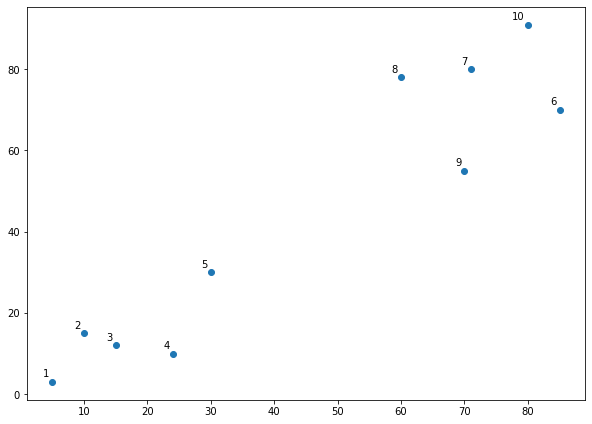

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

The script above draws the data points in the X numpy array and label data points from 1 to 10. In the image below you'll see that the plot that is generated from this code in the above.

Let's name the above plot as Graph1. It can be seen from the naked eye that the data points form two clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.

Coming back to use of dendrograms in hierarchical clustering, let's draw the dendrograms for our data points. We will use the scipy library for that purpose. Execute the following script:

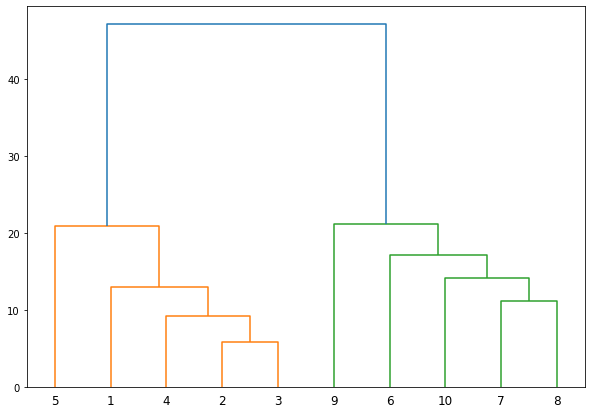

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The output graph looks like the one above. Let's name this plot Graph2.

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 


## Hierarchical Clustering via Scikit-Learn

Enough of the theory, now let's implement hierarchical clustering using Python's Scikit-Learn library.

### Example 1

In our first example we will cluster the X numpy array of data points that we created in the previous section.

The process of clustering is similar to any other unsupervised machine learning algorithm. We start by importing the required libraries:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


The next step is to import or create the dataset. In this example, we'll use the following example data:

In [ ]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

The next step is to import the class for clustering and call its fit_predict method to predict the clusters that each data point belongs to.

Take a look at the following script:

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.

Next we call the fit_predict method from the AgglomerativeClustering class variable cluster. This method returns the names of the clusters that each data point belongs to. Execute the following script to see how the data points have been clustered.

In [7]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.

As expected the first five points have been clustered together while the last five points have been clustered together. It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

Finally, let's plot our clusters. To do so, execute the following code:

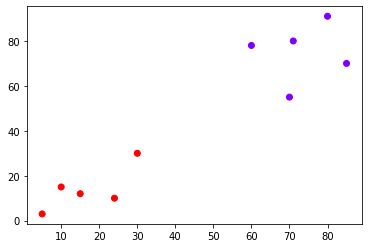

In [8]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

You can see points in two clusters where the first five points clustered together and the last five points clustered together.

### Example 2

In the last section we performed hierarchical clustering on dummy data. In this example, we will perform hierarchical clustering on real-world data and see how it can be used to solve an actual problem.

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem can be downloaded from the following link:

    shopping-data.csv

Place the downloaded "shopping-data.csv" file into the "Datasets" folder of the "D" directory. To cluster this data into groups we will follow the same steps that we performed in the previous section.

Execute the following script to import the desired libraries:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

Next, to import the dataset for this example, run the following code:



In [13]:
customer_data = pd.read_csv(r'C:\Users\Mikaela\Desktop\F20\CIS699\CIS699\CIS699\Ch8_Work\hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

Let's explore our dataset a bit. To check the number of records and attributes, execute the following script:

In [14]:
customer_data.shape

(200, 5)

The script above will return (200, 5) which means that the dataset contains 200 records and 5 attributes.

To eyeball the dataset, execute the head() function of the data frame. Take a look at the following script:

In [15]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [16]:
data = customer_data.iloc[:, 3:5].values

Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset. Execute the following script to do so:

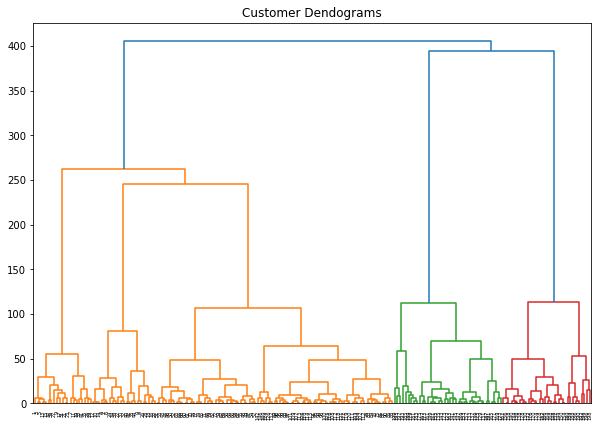

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library. Take a look at the following script:

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

As a final step, let's plot the clusters to see how actually our data has been clustered:

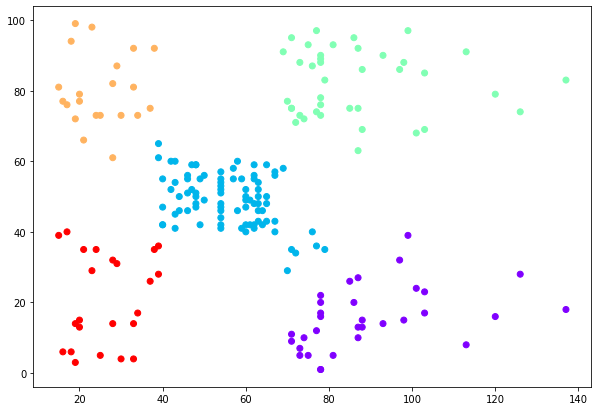

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.

# Resources

Between all of the different Python packages (pandas, matplotlib, numpy, and sklearn) there is a lot of info in this article that might be hard to follow, and for that reason we recommend checking out some more detailed resources on doing data science tasks with Python, such as an online course:

- Data Science in Python, Pandas, Scikit-learn, Numpy, Matplotlib

- Python for Data Science and Machine Learning Bootcamp

- Machine Learning A-Z: Hands-On Python & R In Data Science

We've found that these resources are good enough that you'll come away with a solid understanding of how to use them in your own work.

# Conclusion

The clustering technique can be very handy when it comes to unlabeled data. Since most of the data in the real-world is unlabeled and annotating the data has higher costs, clustering techniques can be used to label unlabeled data.

In this article we explained hierarchical clustering with help of two examples. For more machine learning and data science articles, keep visiting this site. Happy Coding!

# Tutorial from:
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

## Plotly simple dendrogram: 

https://plotly.com/python/dendrogram/